In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
plt.style.use('ggplot')

In [4]:
!kaggle datasets download -d rabieelkharoua/predict-online-course-engagement-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-course-engagement-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
100%|█████████████████████████████████████████| 302k/302k [00:00<00:00, 541kB/s]
100%|█████████████████████████████████████████| 302k/302k [00:00<00:00, 541kB/s]


In [5]:
!unzip predict-online-course-engagement-dataset.zip

Archive:  predict-online-course-engagement-dataset.zip
  inflating: online_course_engagement_data.csv  


In [8]:
df = pd.read_csv('online_course_engagement_data.csv')
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [9]:
df = df.drop(columns = 'UserID')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CourseCategory         9000 non-null   object 
 1   TimeSpentOnCourse      9000 non-null   float64
 2   NumberOfVideosWatched  9000 non-null   int64  
 3   NumberOfQuizzesTaken   9000 non-null   int64  
 4   QuizScores             9000 non-null   float64
 5   CompletionRate         9000 non-null   float64
 6   DeviceType             9000 non-null   int64  
 7   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 562.6+ KB


In [13]:
df.columns

Index(['CourseCategory', 'TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType',
       'CourseCompletion'],
      dtype='object')

# EDA COM ÁRVORE DE DECISÃO


In [22]:
X = df[['QuizScores', 'TimeSpentOnCourse']]
Y = df ['CourseCompletion']

model = DecisionTreeClassifier()
model.fit(X, Y)

DecisionTreeClassifier()

[Text(0.5, 0.875, 'QuizScores <= 70.024\ngini = 0.479\nsamples = 9000\nvalue = [5432, 3568]'),
 Text(0.25, 0.625, 'TimeSpentOnCourse <= 20.03\ngini = 0.307\nsamples = 3643\nvalue = [2954, 689]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'TimeSpentOnCourse <= 1.037\ngini = 0.083\nsamples = 645\nvalue = [617, 28]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'TimeSpentOnCourse <= 20.071\ngini = 0.344\nsamples = 2998\nvalue = [2337, 661]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'TimeSpentOnCourse <= 20.023\ngini = 0.497\nsamples = 5357\nvalue = [2478.0, 2879.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'QuizScores <= 99.422\ngini = 0.304\nsamples = 1081\nvalue = [879, 202]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'TimeSpentOnCourse <= 21.156\ngini = 0.468\nsamples = 4276\nvalue = [1599, 2677]'),
 

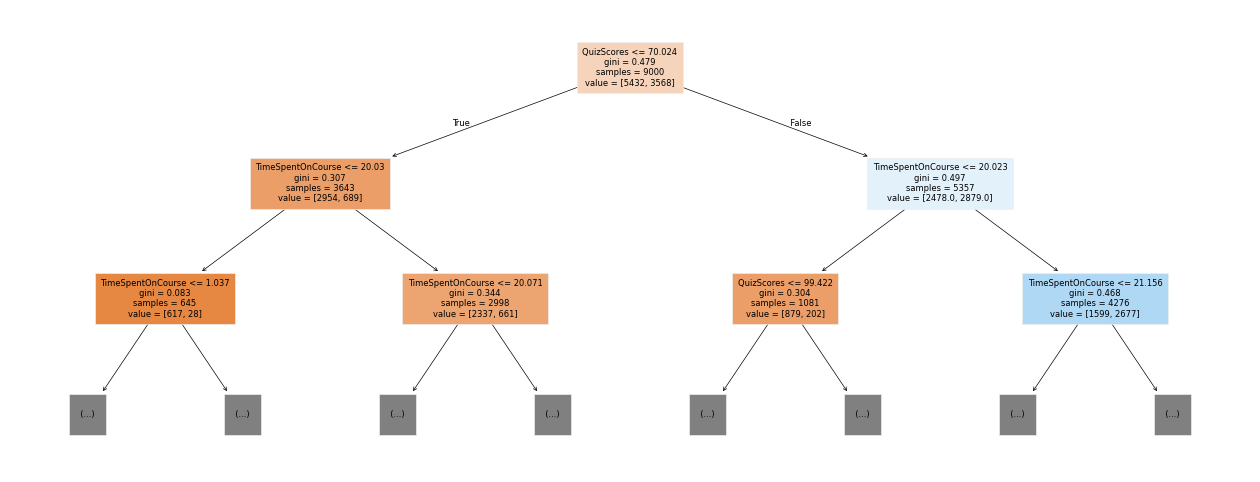

In [27]:
plt.figure(figsize=(16,6))
plot_tree(model, filled=True, feature_names = X.columns, max_depth = 2, fontsize = 6)
           

[Text(0.5, 0.8333333333333334, 'NumberOfVideosWatched <= 5.5\ngini = 0.479\nsamples = 9000\nvalue = [5432, 3568]'),
 Text(0.25, 0.5, 'NumberOfVideosWatched <= 3.5\ngini = 0.26\nsamples = 2563\nvalue = [2169, 394]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'NumberOfVideosWatched <= 10.5\ngini = 0.5\nsamples = 6437\nvalue = [3263, 3174]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

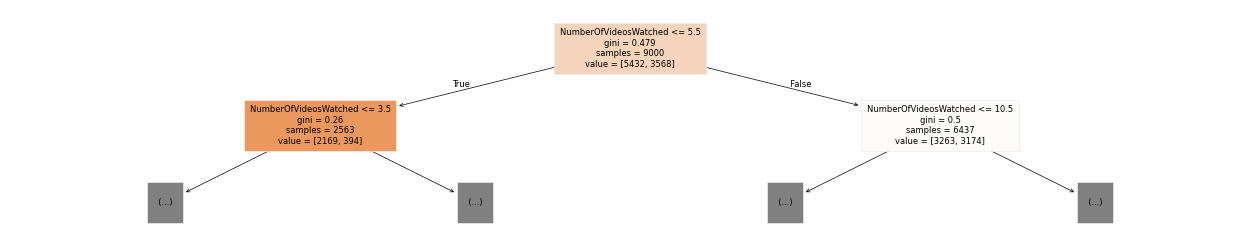

In [29]:
X = df[['NumberOfVideosWatched']]
Y = df ['CourseCompletion']

model = DecisionTreeClassifier()
model.fit(X, Y)

plt.figure(figsize=(16,3))
plot_tree(model, filled=True, feature_names = X.columns, max_depth = 1, fontsize = 6)
           